# Tamil Cinema Dataset Analysis
This notebook provides a step-by-step analysis of the Tamil cinema dataset, with code and explanations for each step.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Tamil cinema dataset
df = pd.read_csv('../datasets/tamil_cinema_dataset.csv')
print('Rows, Cols:', df.shape)
df.head()
df.info()
print('\nMissing values per column:\n', df.isna().sum())

Rows, Cols: (30, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  30 non-null     object 
 1   year                   30 non-null     int64  
 2   genre                  30 non-null     object 
 3   star_power             30 non-null     int64  
 4   director_popularity    30 non-null     int64  
 5   budget_crore           30 non-null     float64
 6   screens                30 non-null     int64  
 7   runtime_min            30 non-null     int64  
 8   imdb_rating            30 non-null     float64
 9   opening_weekend_crore  30 non-null     float64
 10  box_office_crore       30 non-null     float64
 11  random_notes           30 non-null     int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 2.9+ KB

Missing values per column:
 title                    0
year                     0
gen

## Data Loading and Inspection
This cell loads the Tamil cinema dataset and provides a quick overview, including shape, missing values, and basic info.

In [2]:
# Clean text columns if present
def clean_text(x):
    if pd.isna(x):
        return x
    s = str(x).strip()
    s = " ".join(s.split())
    return s

for col in ["gender", "city"]:
    if col in df.columns:
        df[col] = df[col].apply(clean_text)
        df[col] = df[col].str.title()

## Cleaning Text Columns
This cell cleans and standardizes text columns such as 'gender' and 'city' for consistency in analysis.

In [3]:
# Remove duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows")

Removed 0 duplicate rows


## Removing Duplicates
This cell removes duplicate rows from the Tamil cinema dataset to ensure data quality.

In [4]:
# Drop irrelevant/noisy column if present
if 'random_notes' in df.columns:
    df = df.drop(columns=['random_notes'])

## Dropping Irrelevant Columns
This cell removes columns that are not useful for analysis, such as 'random_notes'.

MSE: 464.61
RMSE: 21.55
MAE: 17.60
R^2: 0.924
   actual_box_office  predicted_box_office
0              246.6            289.439535
1              330.2            321.088545
2              123.5            120.425230
3              283.8            265.857544
4              373.7            391.582833
5              283.8            269.028091


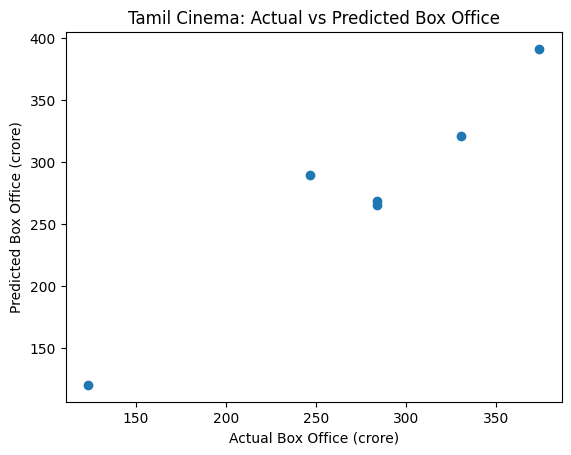

In [5]:
# Feature Engineering and Modeling
if {'star_power', 'director_popularity', 'budget_crore', 'screens'}.issubset(df.columns):
    df['star_dir_combo'] = df['star_power'] * df['director_popularity']
    df['budget_per_screen'] = (df['budget_crore'] / (df['screens'].replace(0, np.nan))).fillna(0)

    num_features = ['year', 'star_power', 'director_popularity', 'budget_crore',
                    'screens', 'runtime_min', 'imdb_rating', 'opening_weekend_crore',
                    'star_dir_combo', 'budget_per_screen']
    cat_features = ['genre']
    num_features = [col for col in num_features if col in df.columns]
    cat_features = [col for col in cat_features if col in df.columns]
    X = df[num_features + cat_features]
    y = df['box_office_crore']

    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from sklearn.preprocessing import OneHotEncoder

    preprocess = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
        ],
        remainder='passthrough'
    )
    pipe = Pipeline(steps=[
        ('prep', preprocess),
        ('model', LinearRegression())
    ])
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R^2: {r2:.3f}")
    preds = pd.DataFrame({
        'actual_box_office': y_test.values,
        'predicted_box_office': y_pred
    })
    print(preds.head(10))
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Box Office (crore)')
    plt.ylabel('Predicted Box Office (crore)')
    plt.title('Tamil Cinema: Actual vs Predicted Box Office')
    plt.show()
else:
    print("Required columns for feature engineering are missing.")

## Feature Engineering and Modeling
This cell performs feature engineering, builds a regression pipeline, trains the model, and visualizes actual vs predicted box office results.